<div align="center">

  <h2>Laboratório de Matemática Computacional (LaMaC)</h2>

  <h3>Tutorial de Visualização de Dados Matplotlib</h3>

  Neste tutorial, exploraremos conceitos fundamentais da biblioteca Matplotlib em Python. Abordaremos visualização de gráficos, manipulação de cores, figuras e até mesmo animações.

</div>

---

### O que é Matplotlib?

Matplotlib é uma biblioteca popular de visualização de dados em Python. Ela oferece uma grande variedade de ferramentas para criar gráficos estáticos, interativos e animados, permitindo a geração de gráficos 2D de alta qualidade. Com o Matplotlib, é possível criar gráficos de linhas, barras, dispersão, histogramas, gráficos de pizza, entre outros tipos, sendo amplamente utilizada em áreas como ciência de dados, engenharia, finanças e pesquisas acadêmicas. A flexibilidade e a vasta gama de opções de personalização tornam o Matplotlib uma ferramenta poderosa para a visualização de dados em Python.

### Importanto as bibliotecas necessárias

Para trabalhar com a biblioteca Matplotlib, na grande maioria das vezes, precisaremos importar **somente** o módulo `matplotlib.pylot`. Neste tutorial importamos a biblioteca *numpy* para auxiliar na criação e manipulação dos dados.

É uma convenção da comunidade e recomendação da biblioteca utilizar o `as plt`.

In [15]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

### Exemplo simples

Primeiro, vamos criar uma função auxiliar para gerar alguns dados aleatórios:

In [16]:
eixo_x = [1,2,3,4,5,6]
gerar_eixo_y = lambda : [np.random.randint(0, 5) for _ in range(len(eixo_x))]
gerar_eixo_y_aleatorio = lambda : [np.random.uniform(0, 5) for _ in range(len(eixo_x))]

Matplotlib plota seus dados em *Figures* (Figuras) (por exemplo, janelas, widgets do Jupyter, etc.), cada uma das quais pode conter um ou mais *Axes* (Eixos), uma área onde pontos podem ser especificados em termos de coordenadas x-y (ou theta-r em um gráfico polar, x-y-z em um gráfico 3D, etc.). A forma mais simples de criar uma *Figure* com um *Axes* é usando `pyplot.subplots`. Podemos então usar `Axes.plot` para desenhar alguns dados no Axes:

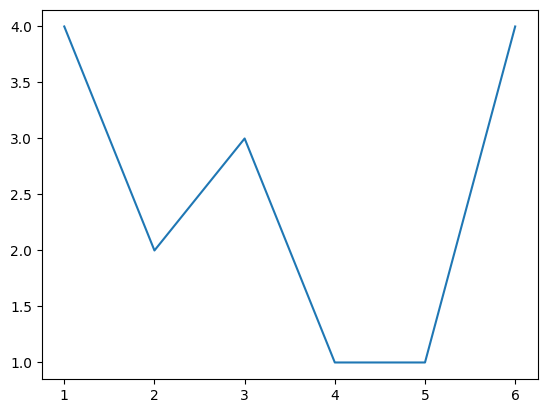

In [17]:
fig, ax = plt.subplots() # Criar uma Figure contendo um único eixo.
ax.plot(eixo_x, gerar_eixo_y()) # Plotar alguns dados no Axes.
plt.show()

### Classes principais

#### Figure

A figura completa. A Figure mantém o controle de todos os Axes filhos, um grupo de *Artists* especiais (títulos, legendas da figura, barras de cor, etc.), e até subfiguras aninhadas.

A maneira mais fácil de criar uma nova Figure é com pyplot:

```python
fig = plt.figure() # uma figura vazia sem Axes
fig, ax = plt.subplots() # uma figura com um único Axes
fig, axs = plt.subplots(2, 2) # uma figura com uma grade de 2x2 Axes
# uma figura com um Axes à esquerda e dois à direita:
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']])
```

#### Artist

Basicamente, tudo visível na Figure é um Artist (até mesmo os objetos Figure, Axes e Axis). Isso inclui objetos Text, objetos Line2D, objetos de coleções, objetos Patch, etc. Quando a Figure é renderizada, todos os Artists são desenhados no canvas. A maioria dos Artists está associada a um Axes; um tal Artist não pode ser compartilhado por vários Axes ou movido de um para outro.

#### Axes

Um Axes é um Artist vinculado a uma Figure que contém uma região para traçar dados e normalmente inclui dois (ou três no caso de 3D) objetos Axis (esteja ciente da diferença entre Axes e Axis) que fornecem marcas e rótulos de marcação para criar escalas para os dados no Axes. Cada Axes também possui um título (definido via set_title()), um rótulo-x (definido via set_xlabel()) e um rótulo-y (definido via set_ylabel()).

#### Axis

Esses objetos definem a escala e os limites, geram as marcas (ticks) no eixo e os rótulos (ticklabels) associados a essas marcas. A posição dos ticks é determinada por um objeto Locator e as strings dos ticklabels são formatadas por um Formatter. A combinação do Locator e Formatter corretos oferece um controle preciso sobre as posições e rótulos dos ticks.

### Múltiplos plots

Podemos plotar mais de um *Axes* em uma figura, utilizando os parâmetros *nrows* e *ncols* do `plt.subplots`. Abaixo mostramos um exemplo com 2 linhas (*nrows*) e 3 colunas (*ncols*):

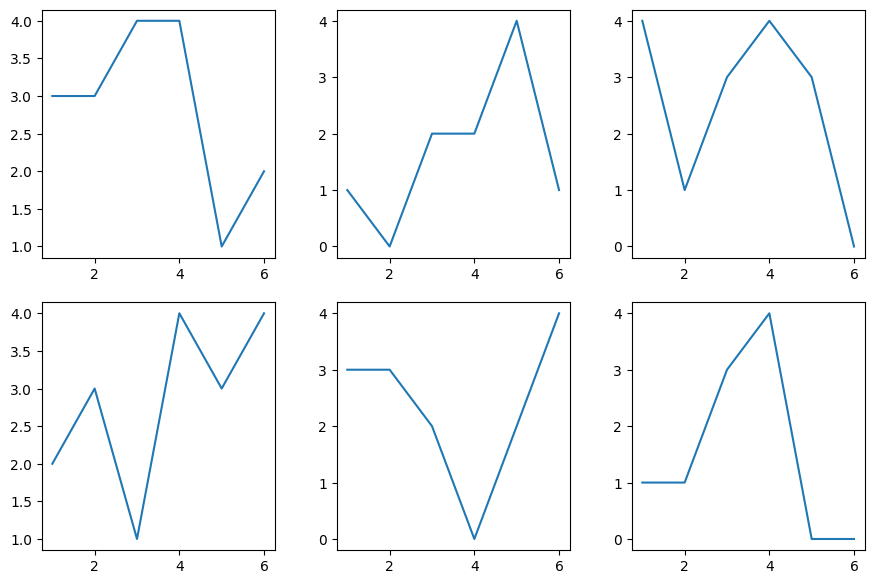

In [18]:
fig, axs = plt.subplots(2, 3, figsize=(9,6)) # figsize ajusta o tamanho da Figure

fig.tight_layout() # Ajusta o espaçamento entre os subplots

# Acessamos cada Axes da seguinte maneira:
axs[0,0].plot(eixo_x, gerar_eixo_y())
axs[0,1].plot(eixo_x, gerar_eixo_y())
axs[0,2].plot(eixo_x, gerar_eixo_y())
axs[1,0].plot(eixo_x, gerar_eixo_y())
axs[1,1].plot(eixo_x, gerar_eixo_y())
axs[1,2].plot(eixo_x, gerar_eixo_y())

plt.show()

É possível, inclusive, criar múltiplos Axes com uma configuração bem customizada de layout:

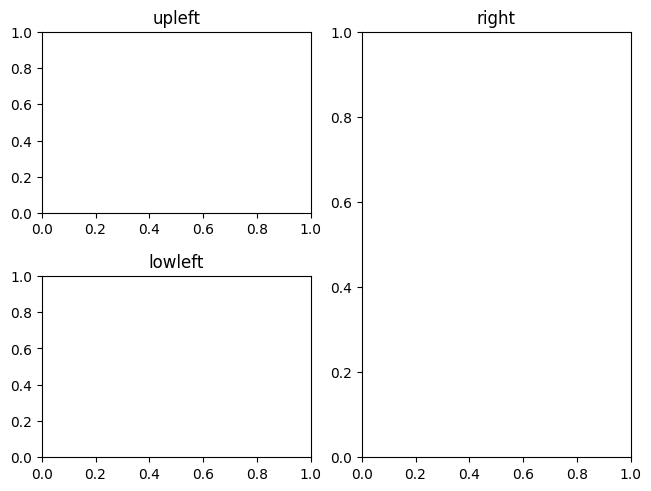

In [19]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right')
plt.show()

### Configurações

Podemos, também, configurar os atributos da Figure, dos Axes e dos Axis:

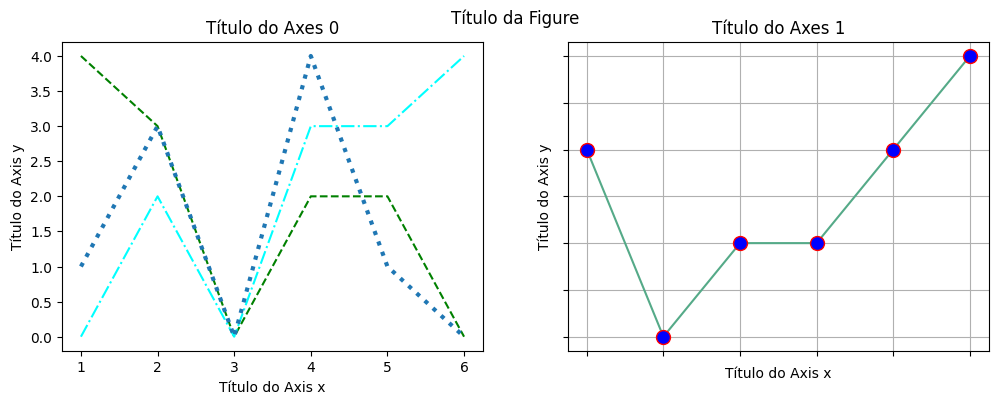

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(10,4)) # figsize ajusta o tamanho da Figure

fig.tight_layout(rect=[0, 0.03, 1, 0.95], w_pad=3)

# Configurando a Figure
fig.suptitle('Título da Figure')

# Configurando os Axes:
axs[0].plot(eixo_x,
            gerar_eixo_y(),
            label='funcao 1',
            linestyle='--', # Possíveis valores ('-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted')
            color='green')

axs[0].plot(eixo_x,
            gerar_eixo_y(),
            label='funcao 2',
            linestyle='-.',
            color='cyan')

axs[0].plot(eixo_x,
            gerar_eixo_y(),
            label='funcao 3',
            linestyle=':',
            linewidth=3)
axs[0].set_title('Título do Axes 0')
axs[0].set_xlabel('Título do Axis x')
axs[0].set_ylabel('Título do Axis y')

axs[1].plot(eixo_x, gerar_eixo_y(),
            label='funcao 1',
            color='#55AA88',
            marker='o', # Adiciona marcadores de formato circular em cada ponto definido
            ms=10, # Seta o tamanho do marcador. Pode ser chamado, também, como "markersize"
            mec='r', # Seta a cor da borda do marcador. Pode ser chamado, também, como "markeredgecolor"
            mfc='b') # Seta a cor do marcador. Pode ser chamado, também, como "markerfacecolor"
axs[1].set_title('Título do Axes 1')
axs[1].set_xlabel('Título do Axis x')
axs[1].set_ylabel('Título do Axis y')
axs[1].grid() # Ativa um grid no fundo do Axes.
axs[1].set(xticklabels=[], yticklabels=[]) # Remove os ticks dos eixos

plt.show()

Ou, pode-se configurar diretamente numa Figure usando o estilo de codificação pelo *pyplot* (ao invés de orientado a objetos conforme mostrado acima, manipulando os objetos `fig` e `axes`):

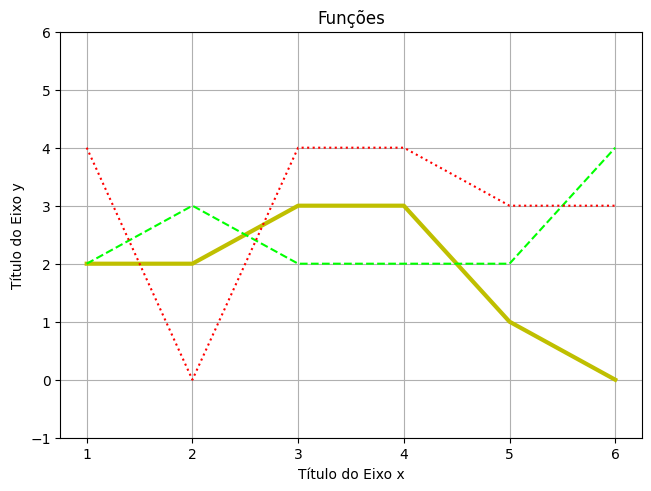

In [21]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(layout='constrained')
plt.plot(eixo_x, gerar_eixo_y(), linewidth=3, color='y')
plt.plot(eixo_x, gerar_eixo_y(), linestyle='dashed', color='#00FF00')
plt.plot(eixo_x, gerar_eixo_y(), linestyle='dotted', color="#FF0000")

plt.ylim(-1, 6)
plt.xlabel('Título do Eixo x')
plt.ylabel('Título do Eixo y')
plt.title("Funções")
plt.grid()

plt.show()

### Anotações e legendas

Com o método `annotate`, podemos criar anotações de diferentes formatos para destacar algo no gráfico.

Bem como podemos, com o método `legend`, criar legendas para contextualizar o observador sobre os plots dentro do Axes.

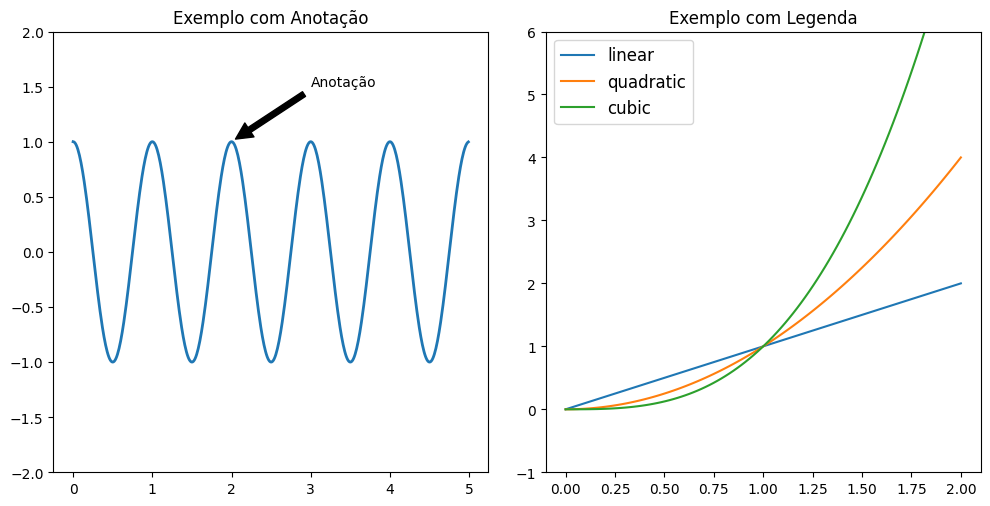

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.tight_layout()

# Exemplo com Anotação
t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
axs[0].plot(t, s, lw=2)
axs[0].annotate('Anotação', # Texto da anotação
                xy=(2, 1), # Localização da anotação
                xytext=(3, 1.5), # Localização do texto da anotação
                arrowprops=dict(facecolor='black', shrink=0.05)) # Formatação da anotação
axs[0].set_ylim(-2, 2)
axs[0].set_title("Exemplo com Anotação")

# Exemplo com Legenda
x = np.linspace(0, 2, 100)
axs[1].plot(x, x, label='linear')
axs[1].plot(x, x**2, label='quadratic')
axs[1].plot(x, x**3, label='cubic')
axs[1].set_ylim(-1, 6)
axs[1].set_title("Exemplo com Legenda")
axs[1].legend(fontsize='large', # int, float ou {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
              loc='upper left')

plt.show()

### Tipos de gráficos

#### Plot

O plot é o gráfico simples que já vimos acima. Onde, dados os pontos x e y (ou apenas y), ele criará segmentos de retas que passarão por todos os pontos:

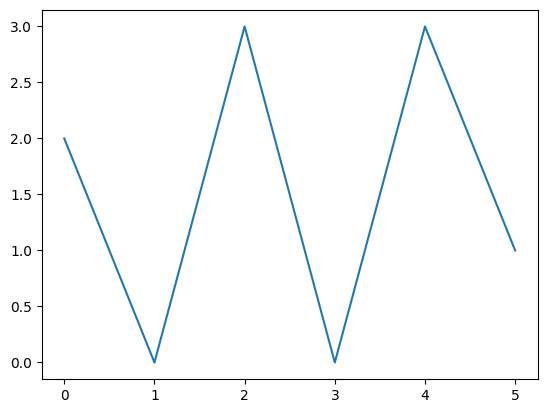

In [23]:
plt.plot(gerar_eixo_y())
plt.show()

#### Scatter

O scatter, dados os pontos de entrada, criará apenas pontos na tela:

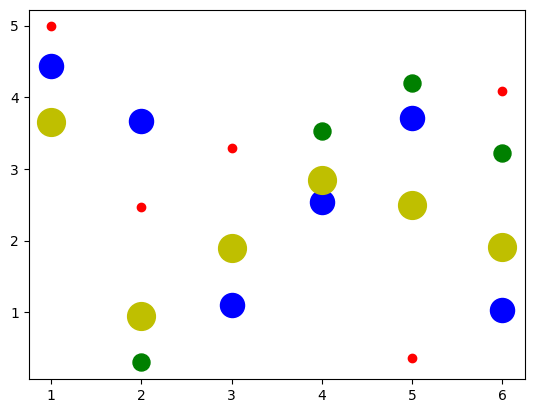

In [24]:
plt.scatter(eixo_x, gerar_eixo_y_aleatorio(), c='r')
plt.scatter(eixo_x, gerar_eixo_y_aleatorio(), c='g', s=150)
plt.scatter(eixo_x, gerar_eixo_y_aleatorio(), c='b', s=300)
plt.scatter(eixo_x, gerar_eixo_y_aleatorio(), c='y', s=400)
plt.show()

#### Histogram

Podemos, também, criar histogramas:

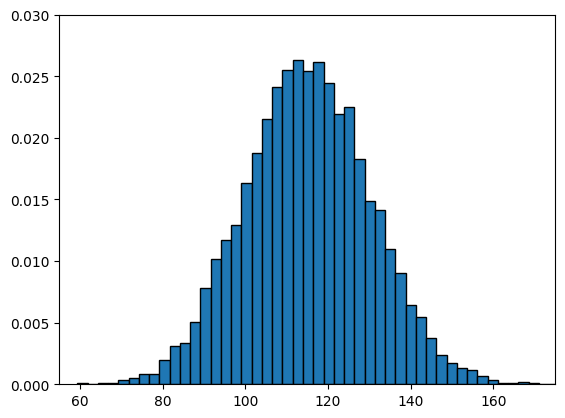

In [25]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)

plt.hist(x, bins=50, density=True, facecolor='C0', edgecolor='black')
plt.axis([55, 175, 0, 0.03])
plt.show()

#### Outros

O matplotlib oferece muitos tipos de plots. Você pode melhor visualizar todos os outros tipos [nesta seção da documentação do matplotlib](https://matplotlib.org/stable/plot_types/index.html).

### Dados 3D

A biblioteca também permite a visualização de dados em 3D:

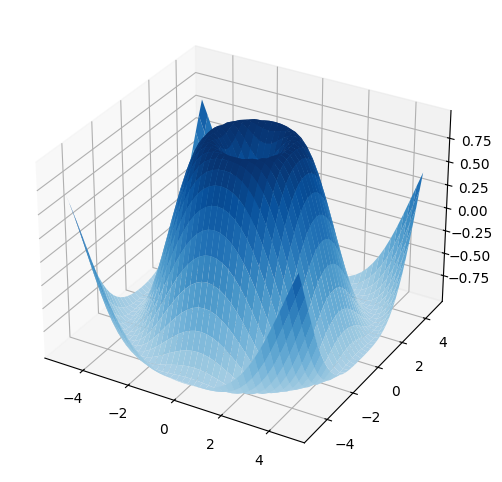

In [26]:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6,6))
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues)

plt.show()

### Autores

- Gabriel Lins

### Referências

[1] [Documentação do Matplotlib](https://matplotlib.org/stable/)